<p><img alt="Colaborat" style="height: 220px;" src="https://github.com/CienciaDatosUdea/001_DataSetFundCienciaDatos/blob/main/semestre2024-2/lab/lab02/Escudo-UdeA.svg.png?raw=true" align="left" hspace="10px" vspace="0px"></p>


# Fundamentos en ciencias de datos


## Proyecto 01: Población Mundial y Pobreza


En este proyecto, explorarás datos de [Gapminder.org](http://gapminder.org), un sitio web dedicado a ofrecer una visión del mundo basada en hechos y cómo ha cambiado. Ese sitio incluye varias visualizaciones y presentaciones de datos, pero también publica los datos en bruto que utilizaremos en este proyecto para recrear y ampliar algunas de sus visualizaciones más famosas. El sitio web de Gapminder recopila datos de muchas fuentes y los compila en tablas que describen muchos países alrededor del mundo. Todos los datos que agregan se publican en el [Systema Globalis](https://github.com/open-numbers/ddf--gapminder--systema_globalis/blob/master/README.md). Su objetivo es compilar todas las estadísticas públicas; sociales, económicas y ambientales; en un conjunto de datos . Todos los conjuntos de datos de este proyecto se copian directamente del Systema Globalis sin ningún cambio. Este proyecto está dedicado a [Hans Rosling](https://en.wikipedia.org/wiki/Hans_Rosling) (1948-2017), quien promovió el uso de datos para entender y priorizar los desafíos del desarrollo global.

In [33]:
# Run this cell to set up the notebook, but please don't change it.
# These lines import the NumPy and Datascience modules.
from datascience import *
import numpy as np
# These lines do some fancy plotting magic.
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

_Type your answer here, replacing this text._

In [34]:
Nombre = "Camilo Rafael Pérez Chaves"
Correo = 'camilorafaelperezchaves@gmail.com'

<!-- END QUESTION -->

## 1. Crecimiento de la Población Mundial

La población mundial de seres humanos alcanzó los 1000 millones alrededor del año 1800; 3000 millones alrededor de 1960, y 7000 millones alrededor de 2011. El impacto potencial del crecimiento exponencial de la población ha preocupado a científicos, economistas y políticos por igual. La División de Población de las Naciones Unidas, estima que es probable que la población mundial continúe creciendo a lo largo del siglo XXI, pero a un ritmo más lento, quizás alcanzando los 11000 millones para el año 2100. Sin embargo, la ONU no descarta escenarios de un crecimiento más extremo.<a href="http://www.pewresearch.org/fact-tank/2015/06/08/scientists-more-worried-than-public-about-worlds-growing-population/ft_15-06-04_popcount/">  <img src="pew_population_projection.png"/> </a>

En esta parte del proyecto, examinaremos algunos de los factores que influyen en el crecimiento de la población y cómo han ido cambiando a lo largo de los años y en todo el mundo. Hay dos subpartes principales en este análisis.

- Primero, examinaremos los datos de un país, Bangladesh. Veremos cómo han cambiado factores como la esperanza de vida, la tasa de fertilidad y la mortalidad infantil a lo largo del tiempo en Bangladesh, y cómo se relacionan con la tasa de crecimiento de la población.

- A continuación, examinaremos si los cambios que hemos observado para Bangladesh son particulares de ese país o si reflejan patrones generales observables en otros países también. Estudiaremos aspectos del crecimiento de la población mundial y veremos cómo han estado cambiando.La primera tabla que consideraremos contiene la población total de cada país a lo largo del tiempo. Ejecuta la celda a continuación.

In [35]:
population = Table.read_table('population.csv').where("time", are.below(2021))
population.show(3)

geo,time,population_total
afg,1800,3280000
afg,1801,3280000
afg,1802,3280000


**Nota:** El archivo csv de población también se puede encontrar [aquí](https://github.com/open-numbers/ddf--gapminder--gapminder_world/blob/master/ddf--datapoints--population_total--by--geo--time.csv). Los datos para este proyecto fueron descargados en febrero de 2017.

# Segunda parte del proyecto.


### El Mundo


Los cambios demográficos observados en Polonia, como en muchos otros países, reflejan una tendencia común que se puede analizar con datos globales. A medida que los países experimentan mejoras en sus servicios de salud, la esperanza de vida tiende a aumentar y la mortalidad infantil disminuye. Sin embargo, estas mejoras suelen estar acompañadas por una caída en la tasa de fertilidad, lo que genera una desaceleración en el crecimiento de la población. Este fenómeno,  es clave para entender los retos y oportunidades del desarrollo global. A pesar de que las personas viven más tiempo, el número de nacimientos no suele ser suficiente para sostener el crecimiento poblacional, lo que plantea desafíos económicos y sociales que pueden estudiarse con técnicas de ciencia de datos.

Preparemos el notebook y hagamos una lectura previa de los datos que tenemos.

In [36]:
fertility=Table().read_table("fertility.csv")
child_mortality = Table().read_table("child_mortality.csv")
population = Table().read_table('population.csv')
countries = Table().read_table('countries.csv')

In [37]:
# Run this cell to set up the notebook, but please don't change it.
# These lines import the NumPy and Datascience modules.
from datascience import *
import numpy as np
# These lines do some fancy plotting magic.
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

A continuación generamos dos histogramas superpuestos, uno para 1962 y otro para 2010, que muestran las distribuciones de las tasas de fertilidad total para estos dos años entre los 201 países en la tabla `fertility`.

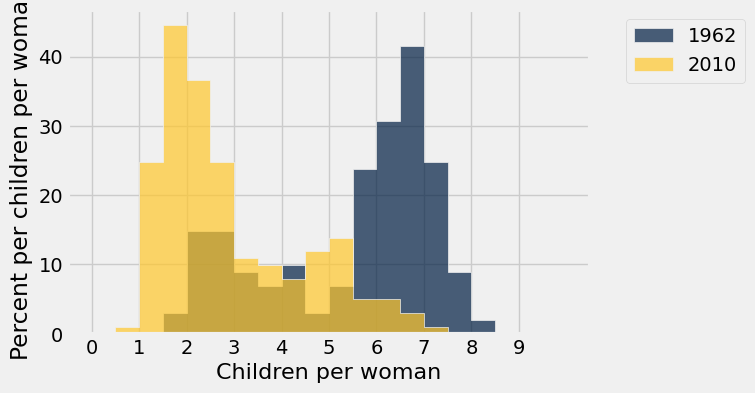

In [38]:
Table().with_columns(
    '1962', fertility.where('time', 1962).column(2),
    '2010', fertility.where('time', 2010).column(2)
).hist(bins=np.arange(0, 10.5, 0.5), unit='child per woman')
_ = plots.xlabel('Children per woman')
_ = plots.ylabel('Percent per children per woman')
_ = plots.xticks(np.arange(10))


- Eje X : El eje X está etiquetado como "Children per woman", es decir, el número de hijos por mujer. Indica el número promedio de hijos que una mujer tendría en su vida en cada país, que esta relacionado con la tasa de fertilidad, que se refiere generalmente a la cantidad promedio de hijos por mujer en un país.


- Eje Y : El eje Y está etiquetado como "Percent per children per woman", Indica el porcentaje de países que tienen ese número específico de hijos por mujer, para los años 1962 y 2010.


**Pregunta 9.** Observa los dos histogramas que comparan las tasas de fertilidad de los países en 1962 y 2010. A continuación, se proporcionan varias afirmaciones que podrían inferirse de estos gráficos.
Tu tarea es asignar a `fertility_statements` un arreglo que contenga valores booleanos, asociados a cada  afirmacion,  que se pueden inferir correctamente a partir de los histogramas.

Ejemplo: Si las afirmaciones correctas son la 0, la 3 y la 5,  y las falsas son la 1, 2, 4,  entonces el arreglo se puede definir así:

`fertility_statements = make_array(False, False, True, True, True, True)`

Estas son las afirmaciones:

0. Aproximadamente el mismo número de países tuvo una tasa de fertilidad entre 3.5 y 4.5, tanto en 1962 como en 2010.

1. En 1962, menos del 20% de los países tenían una tasa de fertilidad inferior a 3.

2.  Al menos la mitad de los países tuvieron una tasa de fertilidad entre 5 y 8 en 1962.

3. En 2010, alrededor del 40% de los países tenían una tasa de fertilidad entre 1.5 y 2.

4.  Al menos la mitad de los países tuvieron una tasa de fertilidad inferior a 3 en 2010.

5. Más países tenían una tasa de fertilidad superior a 3 en 1962 que en 2010.

In [39]:
fertility_statements = make_array(False, False, True, True, True, True)

**Pregunta 10.**  La **poblacion mundial** es la suma de las poblaciones de todos los países, cálcule esa suma en una tabla llamada `world_population` y después realice un gráfico de líneas de la poblacion mundial desde 1800 hasta 2020 (inclusive de ambos extremos). Debes usar la tabla `population` definida anteriormente en el proyecto, el nombre de las columnas de `world_population` deberá ser:
`time`, `population_total sum`



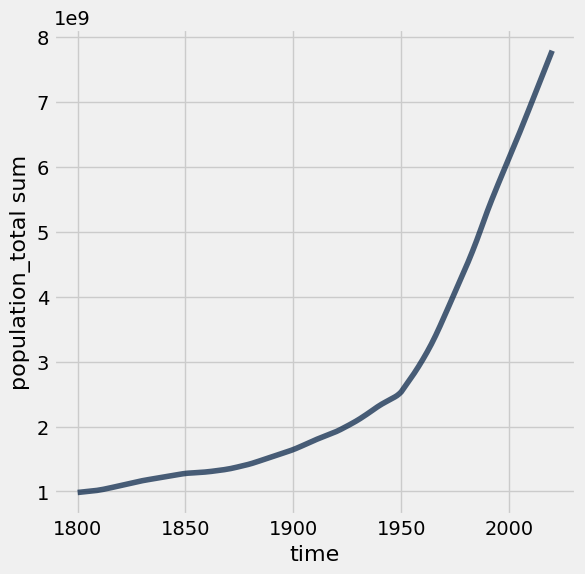

In [40]:
world_population = population.group("time", sum)
world_population = world_population.select("time", "population_total sum").where("time", are.between_or_equal_to(1800, 2020))
world_population.plot("time", "population_total sum")

**Pregunta 11.** Crea una función `stats_for_year` que tome un `year` (año) como argumento y devuelva una tabla de estadísticas:

- La tabla que devuelva debe tener cuatro columnas: `geo` (geografía), `population_total` (población total), `children_per_woman_total_fertility` (número de hijos por mujer - tasa de fecundidad total), y `child_mortality_under_5_per_1000_born` (mortalidad infantil bajo los 5 años por cada 1000 nacidos).

- Cada fila debe contener un código de país único en formato Alpha-3 y tres estadísticas: población, tasa de fecundidad y mortalidad infantil para ese `year` (año) de las tablas `population` (población), `fertility` (fecundidad) y `child_mortality` (mortalidad infantil). Solo incluye filas para las cuales las tres estadísticas estén disponibles para el país y año. Además, restringe el resultado a los códigos de país que aparecen en `big_50`, un arreglo de los 50 países más poblados en 2020. Esta restricción acelerará los cálculos más adelante en el proyecto.

- Después de escribir `stats_for_year`, intenta llamar a `stats_for_year` en cualquier año entre 1960 y 2020. Trata de entender el resultado de `stats_for_year`.


*Pista 1*: Las pruebas para esta pregunta son bastante completas, así que si pasas las pruebas, tu función probablemente sea correcta. Sin embargo, sin llamar a tu función tú mismo y observar el resultado, será muy difícil entender cualquier problema que tengas, así que haz tu mejor esfuerzo para escribir la función correctamente y verifica que funcione antes de confiar en las pruebas del `grader` para confirmar tu trabajo.

*Pista 2*: ¿Qué tienen en común las tres tablas (presta atención a los nombres de las columnas)?

*Pista 3*: Crea celdas adicionales antes de escribir directamente la función.

In [41]:
#Primero creamos una tabla de población que solo incluye los
#50 países con las mayores poblaciones en 2020. Nos enfocamos
#solo en estos 50 países para que los gráficos más adelante se ejecuten más rápido.

big_50 = population.where('time', are.equal_to(2020)).sort("population_total", descending=True).take(np.arange(50)).column('geo')
population_of_big_50 = population.where('time', are.above(1959)).where('geo', are.contained_in(big_50))

def stats_for_year(year):
    p = population_of_big_50.where('time', are.equal_to(year)).drop('time')

    f = fertility.where('time', are.equal_to(year)).drop('time')
    f_col = f.where("geo", are.contained_in(p.column("geo"))).column("children_per_woman_total_fertility")

    c = child_mortality.where('time', are.equal_to(year)).drop('time')
    c_col = c.where("geo", are.contained_in(p.column("geo"))).column("child_mortality_0_5_year_olds_dying_per_1000_born")

    table = Table().with_columns("geo", p.column("geo"), "population_total", p.column("population_total"), "children_per_woman_total_fertility", f_col,"child_mortality_under_5_per_1000_born", c_col)
    return table



In [42]:
stats_for_year(1963)

geo,population_total,children_per_woman_total_fertility,child_mortality_under_5_per_1000_born
afg,9543200,7.45,340.15
ago,5679409,7.59,298.39
arg,21488916,3.08,61.09
bgd,52202008,6.83,242.58
bra,78772647,6.06,155.68
can,18943237,3.56,29.38
chn,694339084,7.41,148.14
cod,16461828,6.05,267.19
col,17629978,6.74,122.58
deu,75080749,2.49,34.63


**Pregunta 12.** Crea una tabla llamada `pop_por_decada` con dos columnas: `decada` y `poblacion`, en ese orden.

- La tabla debe tener una fila para cada año que inicia una década, en orden ascendente desde 1960 hasta 2020. Por ejemplo, 1960 marca el comienzo de la década de los 60.

- La columna `poblacion` debe contener la población total de todos los países incluidos en el resultado de `stats_for_year(year)` para el primer año de cada década. Deberías notar que estos países representan la mayor parte de la población mundial.

**Consejo:** Un enfoque útil sería definir una función llamada `poblacion_para_ano` que calcule la población total, y luego aplicar esa función a la columna `decada`. **Piensa en cómo podrías usar la función `stats_for_year`** de la pregunta anterior si decides implementar `poblacion_para_ano`. Esta primera prueba es simplemente una verificación de coherencia para tu función auxiliar si decides utilizarla. **No perderás puntos por no implementar la función `poblacion_para_ano`.**

**Nota:** La celda en la que generarás la tabla `pop_por_decada` está justo debajo de la celda donde puedes optar por definir la función auxiliar `poblacion_para_ano`. Debes definir tu tabla `pop_por_decada` en la celda que comienza con la tabla `decadas` ya definida.


In [43]:
def pop_for_year(year):
    stats = stats_for_year(year)
    return stats.column('population_total').sum()

# Ahora que has definido tu función auxiliar (si has decidido hacerlo), define la tabla `pop_by_decade`.
tabla_decada = Table().with_columns('decada', np.arange(1960, 2021, 10))
array_poblacion = tabla_decada.apply(pop_for_year, 'decada')
pop_por_decada = Table().with_columns('decada', tabla_decada.column('decada'),'poblacion', array_poblacion)
pop_por_decada.set_format(1, NumberFormatter)


pop_por_decada.set_format(1, NumberFormatter)

decada,poblacion
1960,"2,635,123,897"
1970,"3,221,457,416"
1980,"3,890,044,418"
1990,"4,656,339,803"
2000,"5,377,062,169"
2010,"6,064,674,132"
2020,"6,765,161,289"


Ahora que has definido tu función auxiliar (si has decidido hacerlo), define la tabla `pop_by_decade`.

La tabla `countries` describe diversas características de los países. La columna `country` contiene los mismos códigos que la columna `geo` en cada una de las otras tablas de datos (`population`, `fertility` y `child_mortality`). La columna `world_6region` clasifica a cada país en una región del mundo. Ejecuta la celda de abajo para inspeccionar los datos.

In [62]:
countries = Table.read_table('countries.csv').where('country', are.contained_in(population.group('geo').column('geo')))
countries.select('country', 'name', 'world_6region')

country,name,world_6region
afg,Afghanistan,south_asia
ago,Angola,sub_saharan_africa
alb,Albania,europe_central_asia
and,Andorra,europe_central_asia
are,United Arab Emirates,middle_east_north_africa
arg,Argentina,america
arm,Armenia,europe_central_asia
atg,Antigua and Barbuda,america
aus,Australia,east_asia_pacific
aut,Austria,europe_central_asia


**Pregunta 13.** Crea una tabla llamada `region_counts`. Debe contener dos columnas llamadas `region` y `count`. La columna `region` debe contener las regiones del mundo, y la columna `count` debe contener el número de países en cada región que aparece en el resultado de `stats_for_year(2020)`.Por ejemplo, una fila tendría `south_asia` como su valor de `region` y un número entero como su valor de `count`: la cantidad de países grandes de Asia del Sur para los cuales tenemos cifras de población, fertilidad y mortalidad infantil del año 2020.


*Sugerencia*: Es posible que tengas que renombrar una columna para llamarla `region`.

In [45]:
year_2020_data = stats_for_year(2020).select('geo')
region_counts = countries.where('country', are.contained_in(year_2020_data.column('geo'))).select('country','world_6region')
region_counts = region_counts.group('world_6region').relabel('world_6region','region')
region_counts

region,count
america,8
east_asia_pacific,9
europe_central_asia,10
middle_east_north_africa,7
south_asia,5
sub_saharan_africa,11


El siguiente diagrama de dispersión compara la tasa de fecundidad total y la tasa de mortalidad infantil para cada país en 1960. El área de cada punto representa la población del país, y el color representa su región del mundo. Ejecuta la celda. ¿Crees que puedes identificar alguno de los puntos?

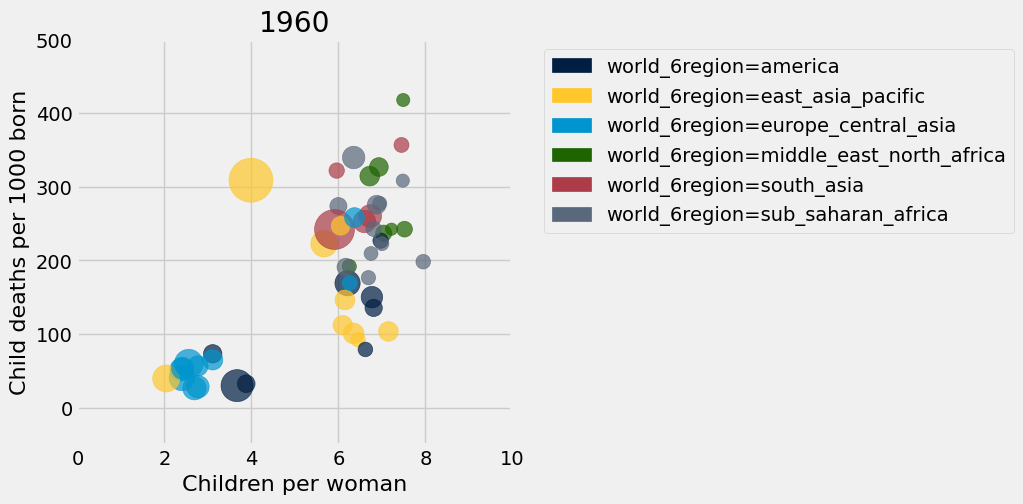

In [46]:
from functools import lru_cache as cache

# This cache annotation makes sure that if the same year
# is passed as an argument twice, the work of computing
# the result is only carried out once.
@cache(None)
def stats_relabeled(year):
    """Relabeled and cached version of stats_for_year."""
    return stats_for_year(year).relabel(2, 'Children per woman').relabel(3, 'Child deaths per 1000 born')

def fertility_vs_child_mortality(year):
    """Draw a color scatter diagram comparing child mortality and fertility."""
    with_region = stats_relabeled(year).join('geo', countries.select('country', 'world_6region'), 'country')
    with_region.scatter(2, 3, sizes=1, group=4, s=500)
    plots.xlim(0,10)
    plots.ylim(-50, 500)
    plots.title(year)
    plots.show()

fertility_vs_child_mortality(1960)

In [47]:
with_region = stats_relabeled(1960).join('geo', countries.select('country', 'world_6region'), 'country')

with_region.sort("population_total", descending=True)

geo,population_total,Children per woman,Child deaths per 1000 born,world_6region
chn,660408054,3.99,308.99,east_asia_pacific
ind,450547675,5.91,242.08,south_asia
usa,186720570,3.67,30.05,america
rus,119871700,2.56,59.88,europe_central_asia
jpn,93673612,2.04,39.71,east_asia_pacific
idn,87751066,5.67,222.78,east_asia_pacific
deu,73414229,2.4,40.47,europe_central_asia
bra,72179235,6.21,169.18,america
gbr,52370595,2.69,26.56,europe_central_asia
ita,49699947,2.39,51.95,europe_central_asia


In [48]:
with_region.sort("population_total", descending=True).sort("Child deaths per 1000 born", descending=True)

geo,population_total,Children per woman,Child deaths per 1000 born,world_6region
yem,5315351,7.49,417.94,middle_east_north_africa
afg,8996967,7.45,356.9,south_asia
nga,45138460,6.35,339.85,sub_saharan_africa
irn,21906909,6.93,326.94,middle_east_north_africa
npl,10105060,5.96,322.1,south_asia
egy,26632891,6.72,314.6,middle_east_north_africa
chn,660408054,3.99,308.99,east_asia_pacific
ago,5454938,7.48,308.45,sub_saharan_africa
moz,7184870,6.95,277.4,sub_saharan_africa
eth,22151284,6.88,275.8,sub_saharan_africa


**Pregunta 14.** Asigna `scatter_statements` a un arreglo con los valores booleanos,  de cada una de las afirmaciones que se pueden inferir de este diagrama de dispersión para 1960, asigna True o False al arreglo, ejemplo :

make_array(True, True, True, False, False)` :

1. Todos los países en `europe_central_asia` tenían tasas de fertilidad uniformemente bajas.
2. La tasa de mortalidad infantil más baja de cualquier país fue en un país de `east_asia_pacific`.
3. La mayoría de los países tiene una tasa de fertilidad superior a 5.
4. Hay una asociación entre la mortalidad infantil y la fertilidad.
5. Los dos países más grandes por población también tuvieron las dos tasas de mortalidad infantil más altas.



In [49]:
scatter_statements = make_array(...)

El resultado de la celda a continuación es interactivo. Arrastra el deslizador hacia la derecha para ver cómo han cambiado los países a lo largo del tiempo. Descubrirás que, en términos de crecimiento poblacional, la división entre los países del Norte global y el Sur global que existía en los años 1960 se ha reducido significativamente.Este cambio en las tasas de fertilidad es la razón por la cual se espera que la población global crezca más lentamente en el siglo XXI de lo que lo hizo en los siglos XIX y XX. Las tasas de fertilidad cambian por razones que incluyen patrones culturales, mejores perspectivas de supervivencia infantil hasta la adultez y la planificación familiar (como el uso de anticonceptivos y el mayor control de las mujeres sobre su reproducción).**Nota:** No te preocupes si aparece una advertencia roja al ejecutar la celda a continuación. ¡Aún podrás ejecutarla!

In [50]:
_ = widgets.interact(fertility_vs_child_mortality,
                     year=widgets.IntSlider(min=1960, max=2020, value=1960))

interactive(children=(IntSlider(value=1960, description='year', max=2020, min=1960), Output()), _dom_classes=(…

Ahora es un buen momento para tomar un descanso y ver los mismos datos presentados por [Hans Rosling en una charla TEDx de 2010](https://www.ted.com/talks/hans_rosling_the_good_news_of_the_decade_we_re_winning_the_war_against_child_mortality?subtitle=en&geo=es) con una animación y algunos comentarios importantes.

Cuando analizamos la población y la fertilidad como científicos de datos, necesitamos aprender sobre las experiencias de las personas en la vida real, no solo de forma abstracta como datos. También debemos reconocer que los estudios de población a veces han tenido trasfondos políticos. Estos trasfondos han incluido el control de la población, el control de la reproducción de las mujeres o temores de cambios entre grupos raciales. Para mejorar como científicos de datos, debemos revisar nuestras suposiciones para evitar reproducir, sin pensar, patrones del pasado.

## 2. Pobreza Global

En 1800, el 85% de los 1,000 millones de personas en el mundo vivían en [pobreza extrema](https://en.wikipedia.org/wiki/Extreme_poverty), definida por las Naciones Unidas como "una condición caracterizada por una grave privación de las necesidades humanas básicas, incluyendo alimentos, agua potable segura, instalaciones sanitarias, salud, refugio, educación e información".  En el momento en que se recopilaron los datos para este proyecto, una definición común de pobreza extrema era una persona viviendo con menos de \$1.25 (dolares) al día.  

En 2018, se estimó que la proporción de personas viviendo en pobreza extrema era de [aproximadamente el 9%](https://unstats.un.org/sdgs/report/2019/goal-01/). Aunque la tasa mundial de pobreza extrema ha disminuido consistentemente durante cientos de años, el número de personas que viven en pobreza extrema todavía supera los 600 millones. Las Naciones Unidas adoptaron un [objetivo ambicioso](http://www.un.org/sustainabledevelopment/poverty/): "Para 2030, erradicar la pobreza extrema para todas las personas en todas partes".  

En esta parte del proyecto, examinaremos algunos aspectos de la pobreza global que podrían afectar si el objetivo es alcanzable. Las causas de la pobreza son complejas. Incluyen historias globales, como el colonialismo, así como factores tales como: la atención sanitaria, la economía y la desigualdad social en cada país.

Primero, carga la población y la tasa de pobreza por país y año, así como las descripciones de los países. Mientras que la tabla de `población` tiene valores para cada año reciente para muchos países, la tabla de `pobreza` solo incluye ciertos años para cada país en los cuales se disponía de una medición de la tasa de pobreza extrema.

In [51]:
countries = Table.read_table('/content/drive/MyDrive/P2/countries (1).csv').where('country', are.contained_in(population.group('geo').column('geo')))
poverty = Table.read_table('/content/drive/MyDrive/P2/poverty (1).csv')
population.show(3)

geo,time,population_total
afg,1800,3280000
afg,1801,3280000
afg,1802,3280000


**Pregunta 1.** Asigna el nombre de  `latest_poverty` a una tabla de tres columnas, con una fila para cada país, que aparece en la tabla `poverty`, con las siguientes caracteristicas:

- La primera columna debe contener el código de 3 letras del país, el nombre de esta columna deberá ser  `geo`

- La segunda columna debe contener el año más reciente para el cual está disponible una tasa de pobreza extrema para el país, el nombre de esta columna deberá ser `time`,

- La tercera columna debe contener la tasa de pobreza en ese año. El nombre de esta columna deberá ser `extreme_poverty_percent_people_below_125_a_day`
<!-- *Pista*: piensa en cómo funciona `group`: realiza una búsqueda secuencial de la tabla (de arriba hacia abajo) y recopila valores en el arreglo en el orden en que aparecen, y luego aplica una función a ese arreglo. La función `first` puede ser útil, pero no estás obligado a usarla. -->

In [52]:
latest_poverty = poverty.select('geo', 'time',).group('geo', max).relabel('time max', 'time')
latest_poverty = latest_poverty.join(('geo', 'time'), poverty).relabel('extreme_poverty_percent_people_below_125_a_day', 'poverty_percent')
latest_poverty

## El grader nos dice que la tercera columna debe llamarse "poverty_percent" y no 'extreme_poverty_percent_people_below_125_a_day'.

geo,time,poverty_percent
ago,2009,43.37
alb,2012,0.46
arg,2011,1.41
arm,2012,1.75
aus,2003,1.36
aut,2004,0.34
aze,2008,0.31
bdi,2006,81.32
bel,2000,0.5
ben,2012,51.61


**Pregunta 2.** Usando tanto `latest_poverty` como `population`, crea una tabla de cuatro columnas llamada `recent_poverty_total` con una fila para cada país en `latest_poverty`. Las cuatro columnas deben tener las siguientes etiquetas y contenidos:

1. `geo` contiene el código de país de 3 letras.
  
2. `poverty_percent` contiene el porcentaje de pobreza más reciente.

3. `population_total` contiene la población del país en 2010.

4. `poverty_total` contiene el número de personas en situación de pobreza **redondeado al número entero más cercano**, basado en la población de 2010 y el porcentaje de pobreza más reciente


In [53]:
population_2010 = population.where('time', are.equal_to(2010)).select('geo', 'population_total')
poverty_total = latest_poverty.select('geo', 'poverty_percent')

recent_poverty_total = population_2010.join('geo', poverty_total)
poblacion_en_pobreza = (recent_poverty_total.column('population_total')*recent_poverty_total.column('poverty_percent'))/100
recent_poverty_total = recent_poverty_total.with_column('poverty_total', poblacion_en_pobreza.round(decimals=0))
recent_poverty_total

geo,population_total,poverty_percent,poverty_total
ago,23356247,43.37,1.01296e+07
alb,2948029,0.46,13561
arg,40895751,1.41,576630
arm,2877314,1.75,50353
aus,22154687,1.36,301304
aut,8409945,0.34,28594
aze,9032465,0.31,28001
bdi,8675606,81.32,7.055e+06
bel,10938735,0.5,54694
ben,9199254,51.61,4.74774e+06


**Pregunta 3.** Asigna el nombre `poverty_percent` al porcentaje conocido de la población mundial en 2010 que vivía en extrema pobreza. Supón que los números de `poverty_total` en la tabla `recent_poverty_total` describen a **todas** las personas en 2010 que vivían en extrema pobreza. Deberías obtener un número que esté por encima de la estimación global de 2018 del 9%, ya que muchas de las tasas de pobreza específicas de los países son anteriores a 2018.

*Pista*: La suma de la columna `population_total` en la tabla `recent_poverty_total` no es la población mundial, porque solo un subconjunto de los países del mundo están incluidos en la tabla `recent_poverty_total` (solo algunos países tienen tasas de pobreza conocidas). Utiliza la tabla `population` para calcular la población total mundial de 2010.

*Pista*: Estamos calculando un porcentaje (valor entre 0 y 100), no una proporción (valor entre 0 y 1).

In [54]:
total_population = population.where('time', 2010).column('population_total').sum()
poverty_total = recent_poverty_total.column('poverty_total').sum()
poverty_percent = poverty_total/total_population*100

poverty_percent

14.248865303997139

La tabla `countries` incluye no solo el nombre y la región de los países, sino también sus posiciones en el globo terráqueo.

In [55]:
countries.select('country', 'name', 'world_4region', 'latitude', 'longitude')

country,name,world_4region,latitude,longitude
afg,Afghanistan,asia,33,66
ago,Angola,africa,-12.5,18.5
alb,Albania,europe,41,20
and,Andorra,europe,42.5078,1.52109
are,United Arab Emirates,asia,23.75,54.5
arg,Argentina,americas,-34,-64
arm,Armenia,europe,40.25,45
atg,Antigua and Barbuda,americas,17.05,-61.8
aus,Australia,asia,-25,135
aut,Austria,europe,47.3333,13.3333


**Pregunta 4.** Usando tanto `countries` como `recent_poverty_total`, crea una tabla llamada `poverty_map` con cinco columnas y una fila para cada país en . Las cinco columnas deben tener las siguientes etiquetas y contenidos, en este orden:

1. `latitude` contiene la latitud del país,
2. `longitude` contiene la longitud del país.
3. `name` contiene el nombre del país no el código de tres letras.
4. `region` contiene la región del país desde la columna `world_4region` de `countries`
5. `poverty_total` contiene el total de pobreza del país.

In [56]:
poverty_map = countries.select('country', 'name', 'world_4region', 'latitude', 'longitude')
poverty_map = poverty_map.join('country', recent_poverty_total, 'geo').drop('country', 'poverty_percent')
poverty_map = poverty_map.select('latitude', 'longitude', 'name', 'world_4region', 'poverty_total').relabel('world_4region', 'region')
poverty_map

latitude,longitude,name,region,poverty_total
-12.5,18.5,Angola,africa,1.01296e+07
41,20,Albania,europe,13561
-34,-64,Argentina,americas,576630
40.25,45,Armenia,europe,50353
-25,135,Australia,asia,301304
47.3333,13.3333,Austria,europe,28594
40.5,47.5,Azerbaijan,europe,28001
-3.5,30,Burundi,africa,7.055e+06
50.75,4.5,Belgium,europe,54694
9.5,2.25,Benin,africa,4.74774e+06


Ejecuta la celda a continuación para dibujar un mapa del mundo en el que las áreas de los círculos representan el número de personas que viven en la pobreza extrema. Haz doble clic en el mapa para acercarte.> **Nota:** Si la celda a continuación no se está cargando, puedes ver el resultado [aquí](https://github.jonathanferrari.com/static/poverty_map.html)

In [57]:
# It may take a few seconds to generate this map.
colors = {'africa': 'blue', 'europe': 'black', 'asia': 'red', 'americas': 'green'}
scaled = poverty_map.with_columns(
    'labels', poverty_map.column('name'),
    'colors', poverty_map.apply(colors.get, 'region'),
    'areas', 1e-4 * poverty_map.column('poverty_total')
).drop('name', 'region', 'poverty_total')

Circle.map_table(scaled)

Aunque en 2010 las personas vivían en la pobreza extrema en todo el mundo (con más de 5 millones en los Estados Unidos), la mayor cantidad se encontraba en Asia y África.

**Pregunta 5.** Asigna `largest` a una tabla de dos columnas con el `nombre` (no el código de 3 letras) y `pobreza_total` de los 10 países con el mayor número de personas viviendo en extrema pobreza.

*Pista*: ¿Cómo podemos usar `take` y `np.arange` en conjunto?

In [58]:
decimo = np.arange(0,10,1)
largest= poverty_map.sort('poverty_total', descending=True).select('name', 'poverty_total').take(decimo)
largest.set_format('poverty_total', NumberFormatter)

name,poverty_total
India,"291,660,639.00"
Nigeria,"98,319,537.00"
China,"85,687,544.00"
Bangladesh,"63,826,375.00"
"Congo, Dem. Rep.","56,635,412.00"
Indonesia,"39,177,145.00"
Ethiopia,"32,242,742.00"
Pakistan,"22,858,700.00"
Tanzania,"19,281,872.00"
Madagascar,"18,543,643.00"


**Pregunta 6.** Es crucial analizar el número absoluto de personas que viven en pobreza, además del porcentaje. Este número absoluto es esencial para determinar cuántos recursos se necesitan para apoyar a las personas en situación de pobreza.  Diversas entidades, como gobiernos, organizaciones internacionales y ONGs, desempeñan un papel crucial en determinar y asignar estos recursos según las necesidades identificadas. En las siguientes preguntas, profundizaremos en este aspecto.


Ahora vamos a crear la función `poverty_timeline`. Esta función debe recibir **el nombre de un país** como argumento (no el código Alpha-3). Su propósito es trazar un gráfico de líneas que muestre el número de personas viviendo en pobreza en ese país, con el tiempo en el eje horizontal. El gráfico debe incluir un punto por cada registro(filas) en la tabla `poverty` correspondiente al país. Para calcular la población en situación de pobreza a partir del porcentaje, multiplícalo por la población del país **en ese año**.

**Nota:** Utiliza `plots.show()` antes de del return de la función

*Pista 1:* Esta pregunta es extensa. Siéntete libre de experimentar creando celdas adicionales. Puedes hacerlo desde la barra de herramientas presionando el botón `+`.

*Pista 2:* Considera el uso de `join` en tu código. Si lo deseas, utiliza la celda de markdown a continuación para planificar tu respuesta, aunque no es obligatorio completarla.

In [67]:
def poverty_timeline(country_name):
  population = Table.read_table('population.csv')
  poverty = Table.read_table('poverty.csv')
  countries_cod = countries.select('name', 'country').relabel('country', 'geo')

  population_alb = countries_cod.join('geo', population).where('name', are.equal_to(country_name))
  poverty_alb= countries_cod.join('geo', poverty).where('name', are.equal_to(country_name))


  grafico_temporal = population_alb.join(('geo','time'), poverty_alb)
  poblacion_pobreza = (grafico_temporal.column('population_total')*grafico_temporal.column('extreme_poverty_percent_people_below_125_a_day'))

  grafico_temporal = grafico_temporal.with_column('poverty_total', poblacion_pobreza)
  grafico_temporal = grafico_temporal.with_column('people_in_poverty', grafico_temporal.apply(round, 'poverty_total'))

  grafico_temporal.plot("time", "people_in_poverty")
  plots.title(country_name)
  plots.ylim(bottom=0)

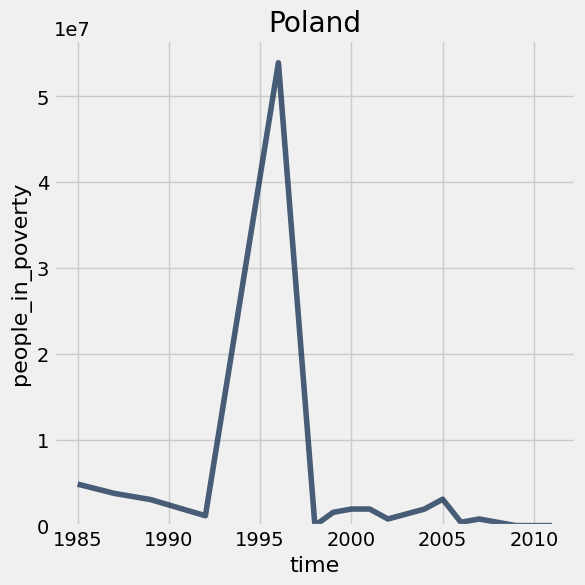

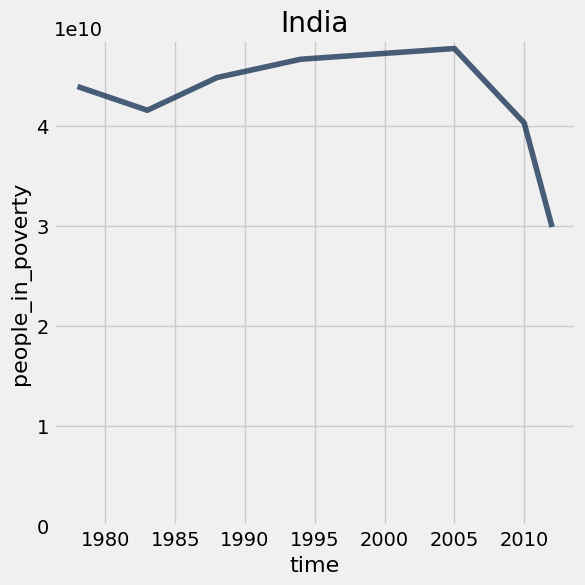

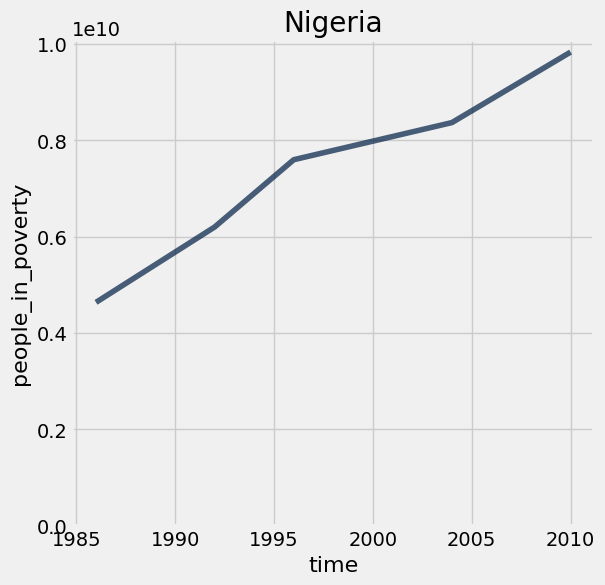

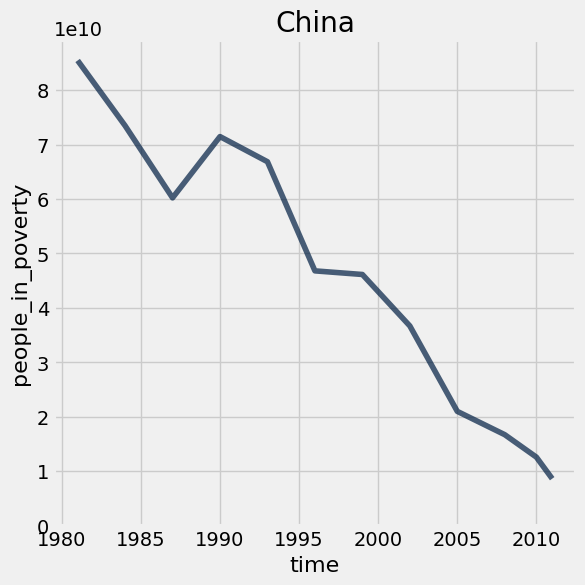

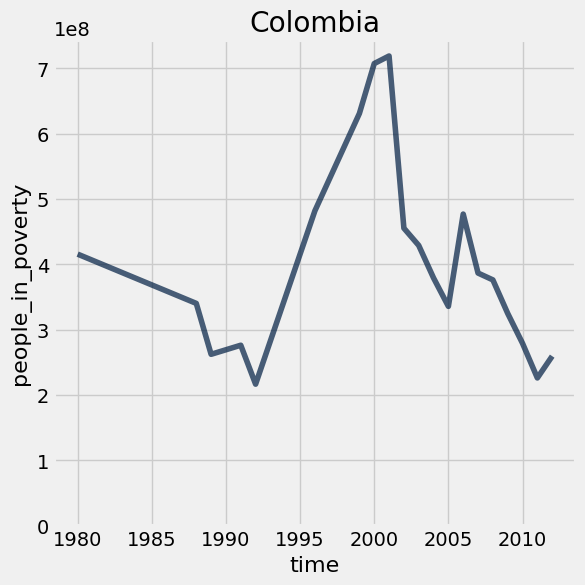

In [60]:
poverty_timeline('Poland')
poverty_timeline('India')
poverty_timeline('Nigeria')
poverty_timeline('China')
poverty_timeline('Colombia')

Aunque el número de personas que viven en extrema pobreza ha aumentado en algunos países, las disminuciones en otros países, especialmente las disminuciones masivas en China e India, han configurado la tendencia general de que la pobreza extrema está disminuyendo en todo el mundo, tanto en porcentaje como en número absoluto. Para aprender más, mira [Hans Rosling en una película de 2015](https://www.gapminder.org/videos/dont-panic-end-poverty/) sobre el objetivo de la ONU de erradicar la pobreza extrema del mundo. A continuación, hemos añadido un menú desplegable interactivo para que puedas visualizar gráficos de la `línea de tiempo de pobreza` para otros países. Ten en cuenta que cada selección del menú desplegable puede tardar unos segundos en ejecutarse.

In [68]:
# Just run this cell
all_countries = countries.column('name')
_ = widgets.interact(poverty_timeline, country_name=list(all_countries))

interactive(children=(Dropdown(description='country_name', options=('Afghanistan', 'Angola', 'Albania', 'Andor…

**Anahi quiere decirte, ¡has terminado!** Felicitaciones por descubrir muchos hechos importantes sobre la pobreza global y demostrar tu dominio en la manipulación de tablas y visualización de datos. Es momento de enviar tu trabajo.**<span style="color: #BC412B"></span>** <u></u>


<img src="Cloe_mafalda.png" alt="Foto en primer plano de un golden retriever mirando a la cámara" width="300"/>


## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

These are some submission instructions.

In [69]:
# Save your notebook first, then run this cell to export your submission.
grader.export(run_tests=True)

NameError: name 'grader' is not defined